# Eval runs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import re

pd.set_option('display.max_columns', None)

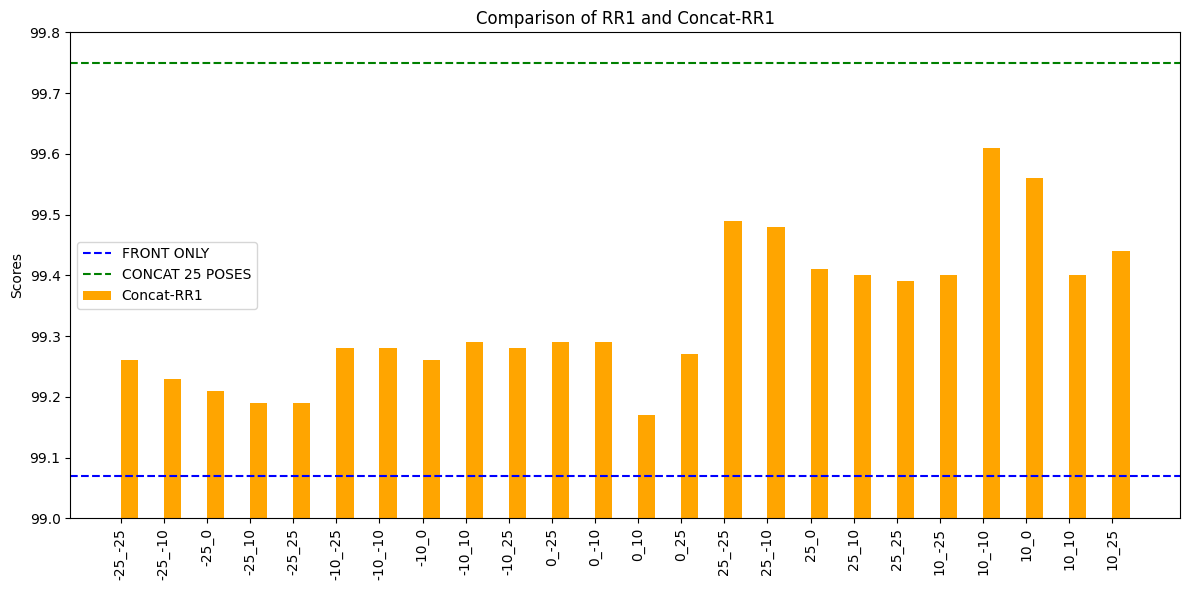

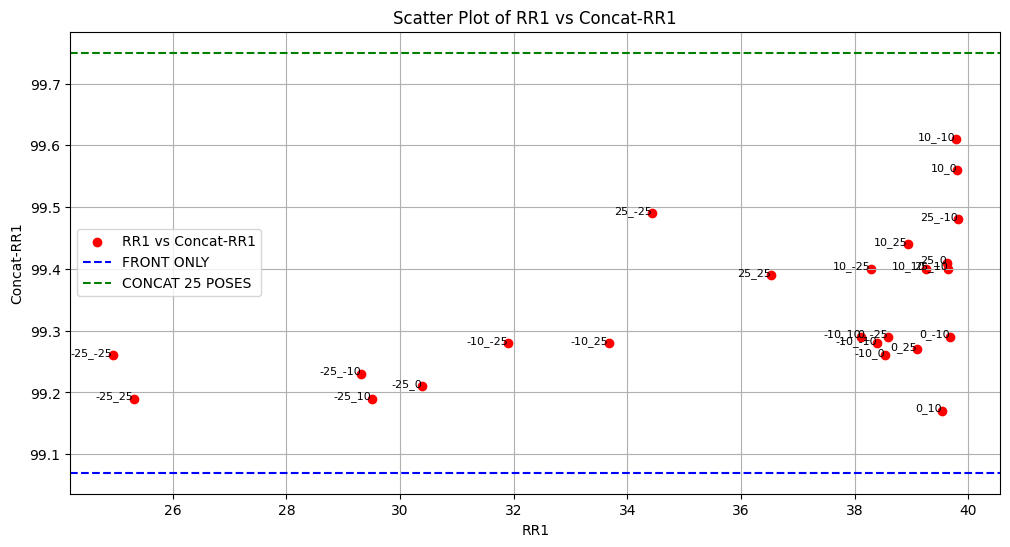

In [31]:
with open('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_ms1m.txt', 'r') as file:
    data = file.readlines()

results = []

# Regex patterns to extract experiment name, RR1, and Concat-RR1
experiment_pattern = re.compile(r'Perform 1:N Evaluation on (\S+)')
rr1_pattern = re.compile(r'RR1: ([\d\.]+)')
concat_rr1_pattern = re.compile(r'Concat-RR1: ([\d\.]+)')

current_experiment = None

for line in data:
    exp_match = experiment_pattern.search(line)
    rr1_match = rr1_pattern.search(line)
    concat_rr1_match = concat_rr1_pattern.search(line)
    
    if exp_match:
        current_experiment = exp_match.group(1)
    
    if rr1_match and concat_rr1_match:
        rr1 = float(rr1_match.group(1))
        concat_rr1 = float(concat_rr1_match.group(1))
        results.append((current_experiment[12:], rr1, concat_rr1))


experiments = [r[0] for r in results]
rr1_values = [r[1] for r in results]
concat_rr1_values = [r[2] for r in results]

x = np.arange(len(experiments))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
#ax.bar(x - width/2, rr1_values, width, label='RR1', color='blue')
ax.bar(x + width/2, concat_rr1_values, width, label='Concat-RR1', color='orange')
ax.axhline(y=99.07, color='blue', linestyle='--', label='FRONT ONLY')
ax.axhline(y=99.75, color='green', linestyle='--', label='CONCAT 25 POSES')
ax.set_ylabel('Scores')
ax.set_title('Comparison of RR1 and Concat-RR1')
ax.set_xticks(x)
ax.set_xticklabels(experiments, rotation=90)
ax.set_ylim(99,99.8)
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(rr1_values, concat_rr1_values, color='red', label='RR1 vs Concat-RR1')
ax.axhline(y=99.07, color='blue', linestyle='--', label='FRONT ONLY')
ax.axhline(y=99.75, color='green', linestyle='--', label='CONCAT 25 POSES')

for i, txt in enumerate(experiments):
    ax.annotate(txt, (rr1_values[i], concat_rr1_values[i]), fontsize=8, ha='right')

ax.set_xlabel('RR1')
ax.set_ylabel('Concat-RR1')
ax.set_title('Scatter Plot of RR1 vs Concat-RR1')
ax.legend()

plt.grid(True)
plt.show()


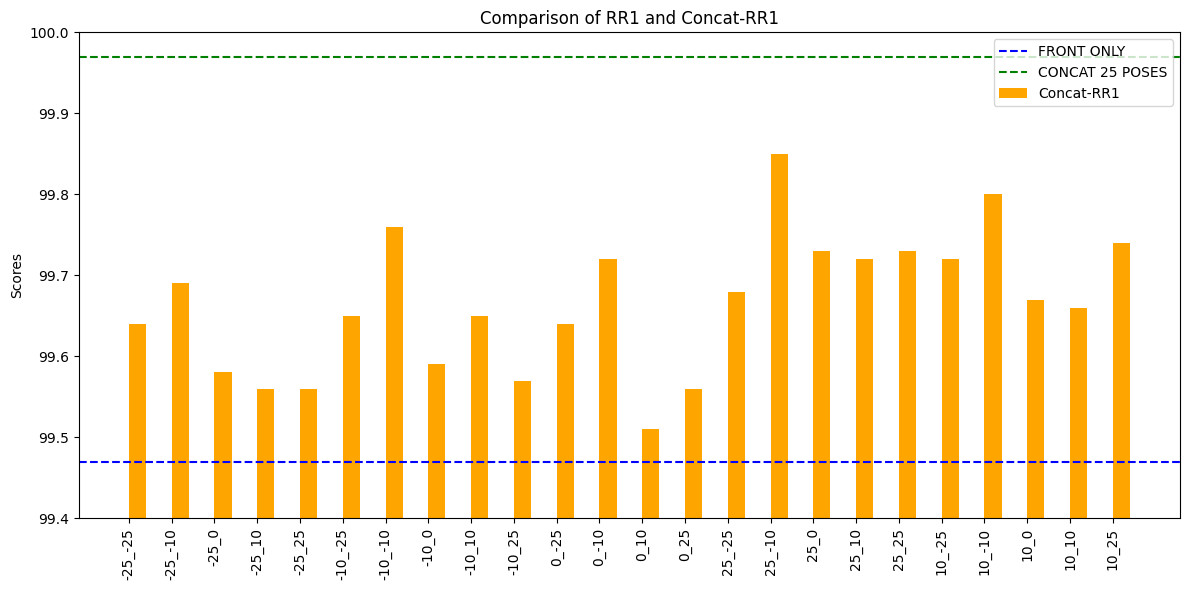

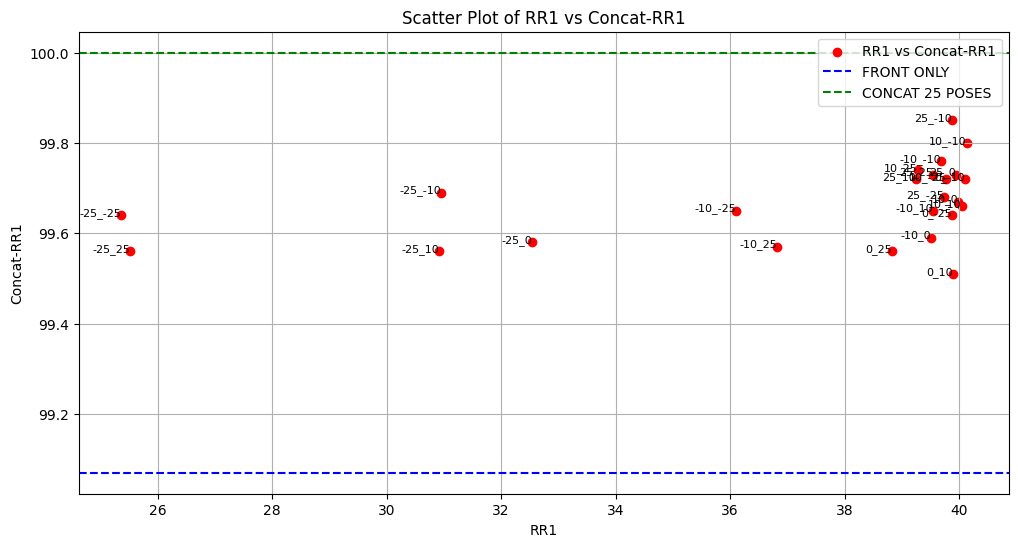

In [36]:
with open('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_asia.txt', 'r') as file:
    data = file.readlines()

results = []

# Regex patterns to extract experiment name, RR1, and Concat-RR1
experiment_pattern = re.compile(r'Perform 1:N Evaluation on (\S+)')
rr1_pattern = re.compile(r'RR1: ([\d\.]+)')
concat_rr1_pattern = re.compile(r'Concat-RR1: ([\d\.]+)')

current_experiment = None

for line in data:
    exp_match = experiment_pattern.search(line)
    rr1_match = rr1_pattern.search(line)
    concat_rr1_match = concat_rr1_pattern.search(line)
    
    if exp_match:
        current_experiment = exp_match.group(1)
    
    if rr1_match and concat_rr1_match:
        rr1 = float(rr1_match.group(1))
        concat_rr1 = float(concat_rr1_match.group(1))
        results.append((current_experiment[12:], rr1, concat_rr1))


experiments = [r[0] for r in results]
rr1_values = [r[1] for r in results]
concat_rr1_values = [r[2] for r in results]

x = np.arange(len(experiments))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
#ax.bar(x - width/2, rr1_values, width, label='RR1', color='blue')
ax.bar(x + width/2, concat_rr1_values, width, label='Concat-RR1', color='orange')
ax.axhline(y=99.47, color='blue', linestyle='--', label='FRONT ONLY')
ax.axhline(y=99.97, color='green', linestyle='--', label='CONCAT 25 POSES')
ax.set_ylabel('Scores')
ax.set_title('Comparison of RR1 and Concat-RR1')
ax.set_xticks(x)
ax.set_xticklabels(experiments, rotation=90)
ax.set_ylim(99.4,100)
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(rr1_values, concat_rr1_values, color='red', label='RR1 vs Concat-RR1')
ax.axhline(y=99.07, color='blue', linestyle='--', label='FRONT ONLY')
ax.axhline(y=100, color='green', linestyle='--', label='CONCAT 25 POSES')

for i, txt in enumerate(experiments):
    ax.annotate(txt, (rr1_values[i], concat_rr1_values[i]), fontsize=8, ha='right')

ax.set_xlabel('RR1')
ax.set_ylabel('Concat-RR1')
ax.set_title('Scatter Plot of RR1 vs Concat-RR1')
ax.legend()

plt.grid(True)
plt.show()
